## Demonstration of [Simpson's Pardox](https://en.wikipedia.org/wiki/Simpson%27s_paradox) using synthetic (made-up) data.
We'll demonstrate the paradox by imagining we are trying to answer the question "do bigger flies live longer?"

In the laboratory, we measure how much flies weigh and how long they live. We use two different genetic strains of flies in our experiment, which we'll call strain 1 and strain 2. We'll try to use realistic numbers based on [this paper](https://www.sciencedirect.com/science/article/abs/pii/S0531556505000331?via%3Dihub).

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.ion()

In [2]:
def beautify_axis(ax):
    """label and clean up axes"""
    ax.set_xlabel('Mass (mg)')
    ax.set_ylabel('Life span (days)')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis="x",direction="in")
    ax.tick_params(axis="y",direction="in")
    return

In [3]:
# generate data sets

n_s1 = 50
n_s2 = 50

mass_s1 = np.random.normal(loc=0.25, scale=0.03, size=n_s1)
mass_s2 = np.random.normal(loc=0.30, scale=0.04, size=n_s2)

print("Strain 1 mean weight (mg): " + str(np.mean(mass_s1)))
print("Strain 2 mean weight (mg): " + str(np.mean(mass_s2)))

life_span_s1 = -180 * mass_s1 + np.random.normal(loc=100, scale=17, size=n_s1)
life_span_s2 = -180 * mass_s2 + np.random.normal(loc=150, scale=11, size=n_s2)

print("Strain 1 mean lifespan (days): " + str(np.mean(life_span_s1)))
print("Strain 2 mean lifespan (days): " + str(np.mean(life_span_s2)))

df = pd.DataFrame()
df['mass'] = np.concatenate([mass_s1, mass_s2])
df['life_span'] = np.concatenate([life_span_s1, life_span_s2])
df['strain'] = np.concatenate([np.ones(n_s1), 2*np.ones(n_s2)])

Strain 1 mean weight (mg): 0.2477380518115093
Strain 2 mean weight (mg): 0.2986786972471841
Strain 1 mean lifespan (days): 53.09380509389696
Strain 2 mean lifespan (days): 95.39592500643343


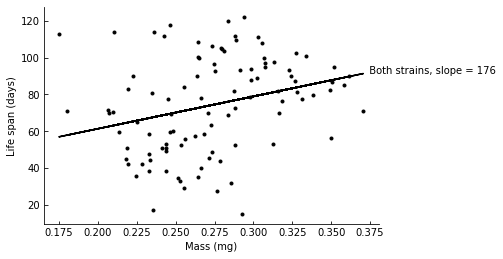

In [4]:
# A basic linear regression indicates heavier flies live longer

regr = linear_model.LinearRegression()
regr.fit(df['mass'].values.reshape(-1, 1), df['life_span'])
life_span_pred = regr.predict(df['mass'].values.reshape(-1, 1))
slope = regr.coef_[0]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df['mass'], df['life_span'], '.k')
ax.plot(df['mass'], life_span_pred, 'k')

label = '  Both strains, slope = ' + str(int(round(slope)))
ax.text(df['mass'].max(), life_span_pred.max(), label, color='k')

beautify_axis(ax)

No handles with labels found to put in legend.


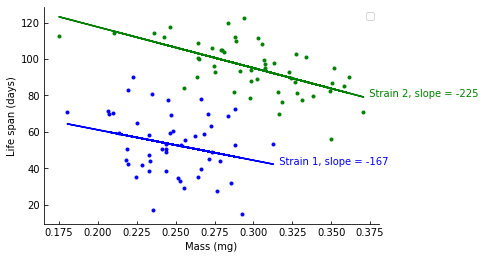

In [5]:
# But if you look at each strain separately, it is clear that lighter flies live longer.
fig = plt.figure()
ax = fig.add_subplot(111)
colors = {1:'b', 2:'g'}

for this_strain in pd.unique(df['strain']):
    df_this_strain = df[df['strain'] == this_strain].copy()
    
    regr = linear_model.LinearRegression()
    regr.fit(df_this_strain['mass'].values.reshape(-1, 1), df_this_strain['life_span'])
    life_span_pred = regr.predict(df_this_strain['mass'].values.reshape(-1, 1))
    
    slope = regr.coef_[0]
    this_color = colors[this_strain]

    this_label = '  Strain ' + str(int(this_strain)) + ', slope = ' + str(int(round(slope)))
    ax.plot(df_this_strain['mass'], df_this_strain['life_span'], '.' + this_color)
    ax.plot(df_this_strain['mass'], life_span_pred,  this_color)
    
    ax.text(df_this_strain['mass'].max(), life_span_pred.min(), this_label, color=this_color)
    
beautify_axis(ax)
ax.legend()

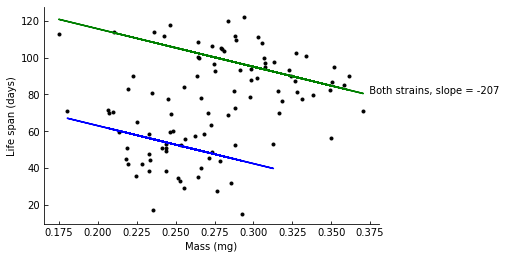

In [6]:
# A second approach using only a single linear regression.
# This time strain is encoded as an additional dimension of the input data.
# Again it is clear that when strain is accounted for, lighter flies live longer.

regr = linear_model.LinearRegression()
regr.fit(df[['mass', 'strain']], df['life_span'])
life_span_pred = regr.predict(df[['mass', 'strain']])

slope = regr.coef_[0]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df['mass'], df['life_span'], '.k')
ax.plot(df['mass'][df['strain'] == 1], life_span_pred[df['strain'] == 1], colors[1])
ax.plot(df['mass'][df['strain'] == 2], life_span_pred[df['strain'] == 2], colors[2])

label = '  Both strains, slope = ' + str(int(round(slope)))
ax.text(df['mass'].max(), life_span_pred[df['strain'] == 2].min(), label, color='k')
beautify_axis(ax)